# Deep Learning: Coursework 1

**Student Name:**  Jeremy Dang (Student Number: 17097407 )

**Start date:** *15th January 2019*

**Due date:** *05th February 2019, 09:00 am*

## How to Submit

When you have completed the exercises and everything has finished running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_cw1.ipynb** before the deadline above.

Please produce a **pdf** with all the **results** (tables and plots) as well as the **answers** to the questions below. For this assignment, you don't need to include any of the code in the pdf, but answers to the questions should be self-contained and should not rely on a code reference.  Page limit: 15 pg. 


### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We should not have to re-run your code.



# Assignment Description

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below).



## The Assignment

### Objectives

Familiarise yourselves with Tensorflow and basic concepts we have covered in the course: like simple neural network models (fully connected models, convolutional networks) and backpropagation.

You will then train these models to classify hand written digits from the Mnist dataset.

### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

    initializer = tf.contrib.layers.xavier_initializer()
    my_variable = tf.Variable(initializer(shape))

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.

*Note*: Sum the loss across the elements of the batch with tf.reduce_sum().

*Hint*: read about TensorFlow's [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) function.

### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function.

*Hint*: read about TensorFlow's [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer).


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 
each time evaluate the accuracy of the model both on **20% of the train set** and on **the entire test set**.

### Reporting

For each model `i`, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       ((num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       ((num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       ((num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]

### Hint 

If you need some extra help, familiarizing yourselves with the dataset and the task of building models in TensorFlow, you can check the [TF tutorial for MNIST](https://www.tensorflow.org/tutorials/mnist/beginners/). 

The tutorial will walk you through the MNIST classification task step-by-step, building and optimizing a model in TensorFlow. 

(Please do not copy the provided code, though. Walk through the tutorial, but write your own implementation).

# Imports and utility functions (do not modify!)

In [0]:
# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 3, figsize=(16,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      if test_accuracy != []:
        cell_text[i].append(test_accuracy[-1])
      else:
        print('Warning: Something went wrong! Missing testing/training data')
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

# PART 1: TensorFlow + Simple NN models  (30 pts) 

## Model 1 (5 pts)

### Network

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1

In [2]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.005), (15, 0.1)]

print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  print("# Epochs", num_epochs, "Learning rate", learning_rate)

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
 
  initializer = tf.contrib.layers.xavier_initializer()
  
  weights = { "w1" : tf.Variable(initializer([784,10]))
            }
    
  bias = {"bias1" : tf.Variable(initializer([10])) 
         }
    
  layer_1 = tf.add(tf.matmul(x,weights['w1']), bias['bias1'])
  
  prediction = tf.nn.softmax(layer_1)
  
  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = layer_1))
    
  training = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
    
  true_predictions = tf.equal(tf.argmax(y_, 1), tf.argmax(prediction, 1))
    
  accuracy = tf.math.reduce_mean(tf.cast(true_predictions, dtype = tf.float64))

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      #################
      # Training step #
      #################
      # use sess.run to execute computational graph

      sess.run(fetches = training,
               feed_dict = {x: batch_xs, y_: batch_ys})
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        # We are told to store training accuracy on 20% of the set
        proportion = 0.2
        eval_input = eval_mnist.train.images
        eval_label = eval_mnist.train.labels
        
        subset = int(len(eval_label)*proportion)
        
        #possibly need to get a random 20% out rather than first 20% out
        subset_input = eval_input[0:subset,:]
        subset_label = eval_label[0:subset,:]
        
        train_accuracy.append(sess.run(fetches = accuracy,
                                       feed_dict = {x: subset_input, y_: subset_label}))
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        
        xs = eval_mnist.test.images
        ys = eval_mnist.test.labels
        testing_accuracy = sess.run(fetches = accuracy,
                                 feed_dict = {x: xs, y_: ys})
          
        test_accuracy.append(testing_accuracy)
        
        
    experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))
    
  

Training Model 1
# Epochs 5 Learning rate 0.0001
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Colocations handled automatical

In [3]:
# Results
for i in range(3):
  print("Epoch, Learning rate", experiments_task1[i][0])
  print("Training Samples:", len(experiments_task1[i][1]))
  print("Training Error", experiments_task1[i][1])
  print("Testing Samples:", len(experiments_task1[i][2]))
  print("Testing Error", experiments_task1[i][2])
  print("")


Epoch, Learning rate (5, 0.0001)
Training Samples: 13
Training Error [0.7542727272727273, 0.8081818181818182, 0.8250909090909091, 0.8384545454545455, 0.8460909090909091, 0.852909090909091, 0.8584545454545455, 0.8627272727272727, 0.865909090909091, 0.8694545454545455, 0.8719090909090909, 0.8729090909090909, 0.8760909090909091]
Testing Samples: 13
Testing Error [0.7674, 0.8225, 0.8416, 0.8548, 0.8643, 0.8685, 0.876, 0.8782, 0.8799, 0.8835, 0.8858, 0.8868, 0.8891]

Epoch, Learning rate (5, 0.005)
Training Samples: 13
Training Error [0.8925454545454545, 0.9008181818181819, 0.9079090909090909, 0.9073636363636364, 0.9157272727272727, 0.9121818181818182, 0.9145454545454546, 0.9182727272727272, 0.9186363636363636, 0.9169090909090909, 0.9202727272727272, 0.9212727272727272, 0.9184545454545454]
Testing Samples: 13
Testing Error [0.9031, 0.9113, 0.9097, 0.9153, 0.9207, 0.9195, 0.9149, 0.9219, 0.9194, 0.9209, 0.9208, 0.9219, 0.9214]

Epoch, Learning rate (15, 0.1)
Training Samples: 41
Training Err

## Model 2 (5 pts)

### Network
1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [4]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  print("# Epochs", num_epochs, "Learning rate", learning_rate)
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  initializer = tf.contrib.layers.xavier_initializer()
    
    
  weights = {"w1" : tf.Variable(initializer([784,32])),  
             "w2" : tf.Variable(initializer([32,10])) 
              }
    
  bias = {"bias1" : tf.Variable(initializer([32])),
          "bias2" : tf.Variable(initializer([10]))
           }
   
  hidden_layer_1 = tf.nn.relu(tf.matmul(x,weights['w1']) + bias['bias1'])
    
  layer_2 =  tf.matmul(hidden_layer_1, weights['w2']) + bias['bias2']
  
  prediction = tf.nn.softmax(layer_2)
  
  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = layer_2))
    
  training = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
    
  true_predictions = tf.equal(tf.argmax(y_, 1), tf.argmax(prediction, 1))
    
  accuracy = tf.math.reduce_mean(tf.cast(true_predictions, dtype = tf.float64))

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(fetches = training,
               feed_dict = {x: batch_xs, y_: batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        proportion = 0.2
        eval_input = eval_mnist.train.images
        eval_label = eval_mnist.train.labels
        
        subset = int(len(eval_label)*proportion)
        
        subset_input = eval_input[0:subset,:]
        subset_label = eval_label[0:subset,:]
        
        train_accuracy.append(sess.run(fetches = accuracy,
                                       feed_dict = {x: subset_input, y_: subset_label}))
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        xs = eval_mnist.test.images
        ys = eval_mnist.test.labels
        testing_accuracy = sess.run(fetches = accuracy,
                                    feed_dict = {x: xs, y_: ys})
          
        test_accuracy.append(testing_accuracy)

    experiments_task2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
# Epochs 15 Learning rate 0.0001
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
# Epochs 15 Learning rate 0.005
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph 

In [5]:
# Results
for i in range(3):
  print("Epoch, Learning rate", experiments_task2[i][0])
  print("Training Samples:", len(experiments_task2[i][1]), "Testing Samples:", len(experiments_task2[i][2]))
  print("Training Error", experiments_task2[i][1])
  print("Testing Error", experiments_task2[i][2])
  print("")

Epoch, Learning rate (15, 0.0001)
Training Samples: 41 Testing Samples: 41
Training Error [0.6836363636363636, 0.7920909090909091, 0.8280909090909091, 0.8459090909090909, 0.8582727272727273, 0.8682727272727273, 0.8756363636363637, 0.8792727272727273, 0.8831818181818182, 0.8857272727272727, 0.8884545454545455, 0.8907272727272727, 0.893090909090909, 0.8949090909090909, 0.8968181818181818, 0.8986363636363637, 0.9006363636363637, 0.9007272727272727, 0.9031818181818182, 0.9046363636363637, 0.9056363636363637, 0.9063636363636364, 0.9060909090909091, 0.9081818181818182, 0.9105454545454545, 0.9095454545454545, 0.9116363636363637, 0.9122727272727272, 0.9120909090909091, 0.9131818181818182, 0.9145454545454546, 0.9143636363636364, 0.9150909090909091, 0.9159090909090909, 0.9167272727272727, 0.917, 0.9176363636363636, 0.9192727272727272, 0.9191818181818182, 0.9200909090909091, 0.9204545454545454]
Testing Error [0.704, 0.8123, 0.8449, 0.8652, 0.8746, 0.8828, 0.888, 0.8922, 0.8976, 0.8985, 0.9009, 0.

## Model 3 (5 pts)

### Network
2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.05

In [6]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.001), (40, 0.001), (40, 0.05)]

print('Training Model 3')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  print("# Epochs", num_epochs, "Learning rate", learning_rate)
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  initializer = tf.contrib.layers.xavier_initializer()
    
  weights = {"w1" : tf.Variable(initializer([784,32])),
             "w2" : tf.Variable(initializer([32,32])),
             "w3" : tf.Variable(initializer([32,10]))
            }
    
  bias = {"bias1" : tf.Variable(initializer([32])),
          "bias2" : tf.Variable(initializer([32])),
          "bias3" : tf.Variable(initializer([10]))
         }
    
  hidden_layer_1 = tf.nn.relu(tf.matmul(x,weights['w1']) + bias['bias1'])
   
  hidden_layer_2 = tf.nn.relu(tf.matmul(hidden_layer_1,weights['w2']) + bias['bias2'])
    
  layer_2 = tf.matmul(hidden_layer_2, weights['w3']) + bias['bias3']  
    
  prediction = tf.nn.softmax(layer_2)
    
  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = layer_2))
    
  training = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
    
  true_predictions = tf.equal(tf.argmax(y_,1), tf.argmax(prediction,1))
    
  accuracy = tf.math.reduce_mean(tf.cast(true_predictions, dtype = tf.float64))

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(fetches = training,
               feed_dict = {x: batch_xs, y_: batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        proportion = 0.2
        eval_input = eval_mnist.train.images
        eval_label = eval_mnist.train.labels
        
        subset = int(len(eval_label)*proportion)
        
        #possibly need to get a random 20% out rather than first 20% out
        subset_input = eval_input[0:subset,:]
        subset_label = eval_label[0:subset,:]
        
        train_accuracy.append(sess.run(fetches = accuracy,
                                       feed_dict = {x: subset_input, y_: subset_label}))

        #####################################
        # Compute and store test accuracy.  #
        #####################################

        xs = eval_mnist.test.images
        ys = eval_mnist.test.labels
        testing_accuracy = sess.run(fetches = accuracy,
                                    feed_dict = {x: xs, y_: ys})
          
        test_accuracy.append(testing_accuracy)

    experiments_task3.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
# Epochs 5 Learning rate 0.001
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
# Epochs 40 Learning rate 0.001
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph wa

In [7]:
# Results
for i in range(3):
  print("Epoch, Learning rate", experiments_task3[i][0])
  print("Training Samples:", len(experiments_task3[i][1]), "Testing Samples:", len(experiments_task3[i][2]))
  print("Training Error", experiments_task3[i][1])
  print("Testing Error", experiments_task3[i][2])
  print("")

Epoch, Learning rate (5, 0.001)
Training Samples: 13 Testing Samples: 13
Training Error [0.8777272727272727, 0.9070909090909091, 0.9223636363636364, 0.9285454545454546, 0.9381818181818182, 0.9436363636363636, 0.9430909090909091, 0.9528181818181818, 0.9536363636363636, 0.9562727272727273, 0.956, 0.9576363636363636, 0.9614545454545455]
Testing Error [0.8871, 0.9142, 0.9268, 0.9282, 0.9405, 0.9429, 0.9481, 0.9507, 0.9515, 0.954, 0.9546, 0.9545, 0.9587]

Epoch, Learning rate (40, 0.001)
Training Samples: 110 Testing Samples: 110
Training Error [0.8782727272727273, 0.9056363636363637, 0.9151818181818182, 0.9306363636363636, 0.9317272727272727, 0.9403636363636364, 0.9486363636363636, 0.9482727272727273, 0.9561818181818181, 0.9545454545454546, 0.9602727272727273, 0.9638181818181818, 0.9643636363636363, 0.9653636363636363, 0.9653636363636363, 0.9672727272727273, 0.9676363636363636, 0.972909090909091, 0.9708181818181818, 0.9717272727272728, 0.9724545454545455, 0.9765454545454545, 0.972363636363

# Results

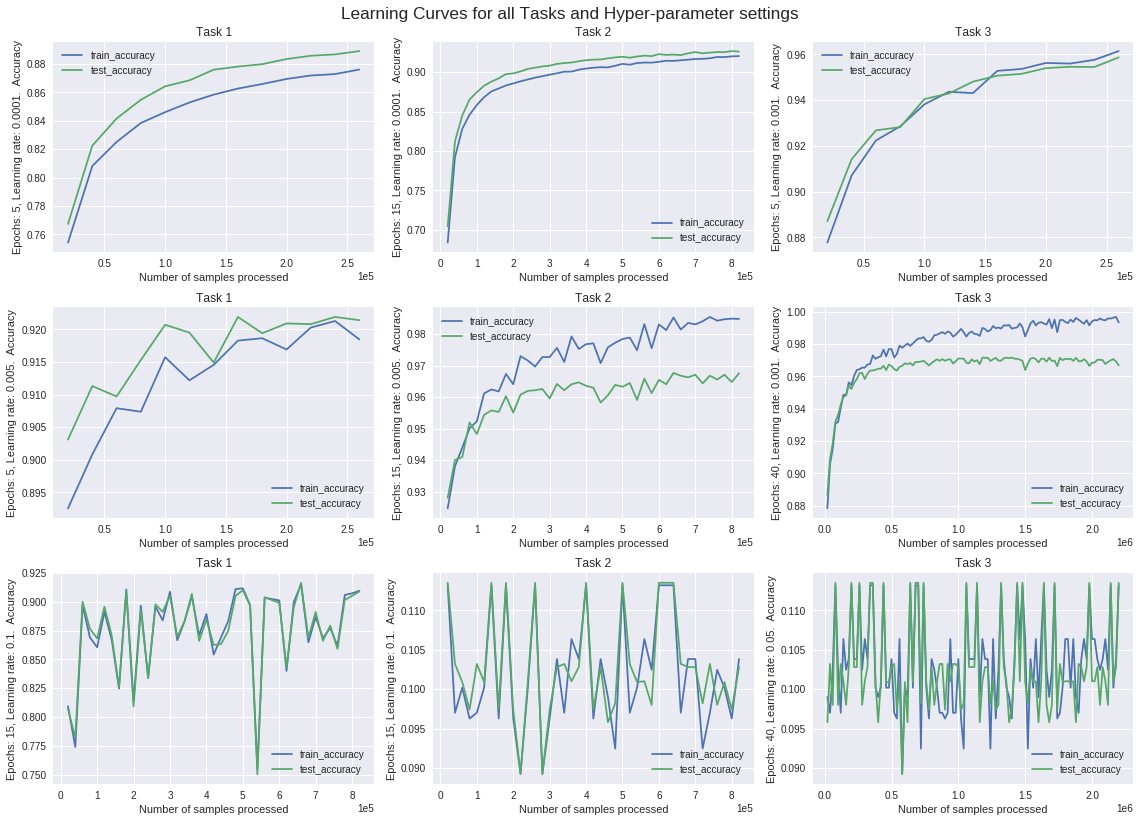

In [8]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3])

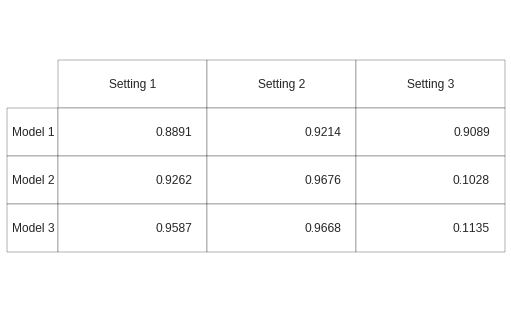

In [9]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3]) 

# Questions

### Q1.1 (3 pts): Indicate which of the previous experiments constitute an example of over-fitting. Why is this happening?

Model 2 - task 2 and 3
Model 3 - task 2

Are the models and settings I think are an example of overfitting since their training and testing accuracies diverge.

For model 2 - task 2 and 3 this is probably due to the larger learning rate.

For model 3 - task 2 is probably due to the epochs since training took long



### Q1.2 (2 pts): Indicate which of the previous experiments constitute an example of under-fitting. Why is this happening?

Model 1 - task 1 

Model 2 - task 1 


Are the models and settings I think are an example of underfitting due to the trends in accuracies being far to *linear* compared to everything else.

For model 1 - task 1 is probably caused by the how low the number of epochs is

For model 2 - task 2 is probably caused for the reason as model 1

### Q1.3 (2 pts): How would you prevent over-/under-fitting from happening?

How I would prevent overfitting would be to either do the following:

1) Use less features

2) Enhance data such as binary conversion and normalising values  to training data ect

3) Can add a regulariser like a L2 - norm

4) Dropping out in Neural networks will help prevent overfitting and batch normalisation.

5) Use a simpler model

To prevent underfitting I could either do:

1) Add more complexity to the model such as more layers or units in a neural network

2) Tune hyper parameters more efficiently by using grid/random search and also choose a small enough learning rate and a large enough epochs and use early stopping.

3) Reduce regularisation if regularisation existant

4) Add more training data




### Q1.4 (8 pts): Pick one model that is over-fitting and implement your proposed fix. Train your model and report your new training/testing curves below. 

For the setting with $15$ epochs and a learning rate of $0.005$ I have applied the drop-out method with a drop-out rate of $0.5$.

In [10]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task25 = []
settings = [(15, 0.005)]

print('Training Model 2.5 - Applying methods to prevent overfitting')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  print("# Epochs", num_epochs, "Learning rate", learning_rate)
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  initializer = tf.contrib.layers.xavier_initializer()
    
    
  weights = {"w1" : tf.Variable(initializer([784,32])),  
             "w2" : tf.Variable(initializer([32,10])) 
              }
    
  bias = {"bias1" : tf.Variable(initializer([32])),
          "bias2" : tf.Variable(initializer([10]))
           }
   
  hidden_layer_1 = tf.nn.relu(tf.matmul(x,weights['w1']) + bias['bias1'])
  
  # applying dropping out
  hidden_layer_1 = tf.nn.dropout(hidden_layer_1, keep_prob = 0.5)
    
  layer_2 =  tf.matmul(hidden_layer_1, weights['w2']) + bias['bias2']
  
  prediction = tf.nn.softmax(layer_2)
  
  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = layer_2))
    
  training = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
    
  true_predictions = tf.equal(tf.argmax(y_, 1), tf.argmax(prediction, 1))
    
  accuracy = tf.math.reduce_mean(tf.cast(true_predictions, dtype = tf.float64))

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(fetches = training,
               feed_dict = {x: batch_xs, y_: batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        proportion = 0.2
        eval_input = eval_mnist.train.images
        eval_label = eval_mnist.train.labels
        
        subset = int(len(eval_label)*proportion)
        
        subset_input = eval_input[0:subset,:]
        subset_label = eval_label[0:subset,:]
        
        train_accuracy.append(sess.run(fetches = accuracy,
                                       feed_dict = {x: subset_input, y_: subset_label}))
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        xs = eval_mnist.test.images
        ys = eval_mnist.test.labels
        testing_accuracy = sess.run(fetches = accuracy,
                                    feed_dict = {x: xs, y_: ys})
          
        test_accuracy.append(testing_accuracy)

    experiments_task25.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2.5 - Applying methods to prevent overfitting
# Epochs 15 Learning rate 0.005
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


# Q1.4 Output

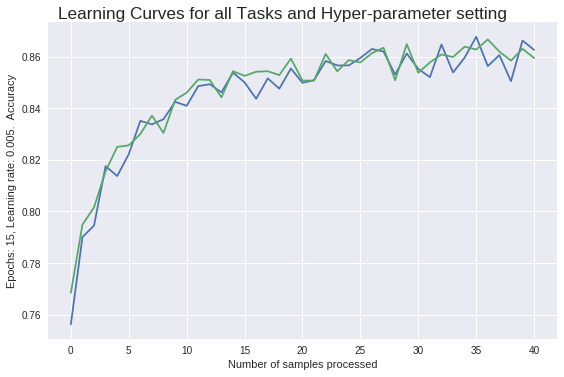

In [34]:
# Results
#for i in range(1):
  #print("Epoch, Learning rate", experiments_task25[i][0])
  #print("Training Samples:", len(experiments_task25[i][1]), "Testing Samples:", len(experiments_task25[i][2]))
  #print("Training Error", experiments_task25[i][1])
  #print("Testing Error", experiments_task25[i][2])
  #print("")
  
fig, ax = plt.subplots(1, 1)
st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter setting",
      fontsize="x-large")

# Components to plot
setting = experiments_task25[0][0]
training_acc = experiments_task25[0][1]
testing_acc = experiments_task25[0][2]

# Plot
ax.plot(training_acc)
ax.plot(testing_acc)
ax.set_xlabel('Number of samples processed')
ax.set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
  
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.91)
plt.show()

# PART 2:  Backpropagation (35 pts)

### Objectives

This part will be mirroring the first one, but this time you are **not allowed to use any of the Tensorflow functionality for specifing nor optimizing** your neural network models. 
You will now use your **own implementations** of different neural network models (labelled Model 1-3, and described in the corresponding sections of the Colab). This means for each of these models, and the layers they are composed of, you will need to implement:
* **Forward pass**
* **Backward pass**

Keep in mind, the purpose of this exercise is to implement and optimize your own neural networks
architectures without the toolbox/library tailored to do so. **This also means, in order to train and evaluate your models, you will need to implement your own optimization procedure. You are to use the same cross-entropy loss as before and your own implementation of SGD.**

As before, you will train these models to classify hand written digits from the Mnist dataset. 


#### Additional instructions

**Do not use any other libraries than the ones provided in the imports cell.** You should be able to do everything via *numpy* (especially for the convolutional layer, rely on the in-built matrix/tensor multiplication that numpy offers).  

There are a few questions at the end of the colab. **Before doing any coding, please take a look at Question 2.1** -- this should help you with the implementations, especially the optimization part.

### Hints

Remind yourselves of the chain rule and read through the lecture notes on back-propagation (computing 
the gradients by recursively applying the chain rule). This is a general procedure that applies to all model
architectures you will have to code in the following steps. Thus, you are to implement an
optimization procedure that generalizes and can be re-used to train all your models. Recall the only things
that you will need for each layer are: 

(i) the gradients of layer activations with respect to its input

(ii) the gradients with respect to its parameters, if any.

(See Question 2.1).


Also from the previous assignment, you should have a good idea of what to expect, both in terms of behavior and relative performance. (To keep everything comparable, we kept all the hyperparameters and reporting the same).

## Model 1 (10 pts)

### Network

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1

In [0]:

class linear_layer(object):
  
  def __init__(self, weight, bias):
    # takes inputs [a,b] and [c] for weight and bias respectively
    # Do xavier initialization as notes suggested
    
    fan_in_w = weight[0]
    fan_out_w = weight[1]
    fan_in_b = bias[0] 
  
    
    xavier_init_weights = np.sqrt(6.0 / (fan_in_w + fan_out_w))
    xavier_init_biases = np.sqrt(6.0 / (fan_in_b))
    
    # sample from uniform distribution since it is part of xavier initialization
    self.weight = np.random.uniform(-xavier_init_weights, xavier_init_weights, weight)

    self.bias = np.random.uniform(-xavier_init_biases, xavier_init_biases, bias)

  def linear_forwardprop(self, inputs):
    
    lin_transform = np.add(np.matmul(inputs, self.weight), self.bias)
      
    return lin_transform
  
  def linear_backprop(self, dloss_dy, inputs):

    dloss_dx = np.matmul(dloss_dy, np.transpose(self.weight))
    
    grad_weight = np.matmul(np.transpose(inputs),dloss_dy)
    grad_bias = np.sum(dloss_dy)

    self.bias = self.bias - learning_rate*grad_bias # in notes theta - eta*dl/dy ect
    self.weight = self.weight - learning_rate*grad_weight
    
    return dloss_dx

class relu_layer(object):
    
  def relu_forwardprop(self,inputs):
    
    return np.maximum(0,inputs)
  
  def relu_backprop(self,dloss_dy,y):
    
    dloss_dx = dloss_dy * (y > 0)
    return dloss_dx
    
class Softmax(object):

  def softmax_forwardprop(self, inputs):
    numerator = np.exp(inputs - np.amax(inputs, axis=1, keepdims = True ))
    denominator = np.sum(numerator, axis=1, keepdims = True)
    return np.divide(numerator,denominator)

class CrossEntropy(object):
  
  def ce_forwardprop(self, preds, actual): # Use definition of loss they gave
    loss = np.sum(np.log((np.sum(np.exp(preds), axis=1))) - preds[range(preds.shape[0]),np.argmax(actual,1)])
    return loss
  
  def ce_backprop(self,x,y_): # Q2.1 derivation
    numerator = np.exp(x - np.maximum.reduce(x, axis=1, keepdims = True))
    denominator = np.sum(numerator, axis=1, keepdims = True )
    cross_entropy = numerator / denominator
    cross_entropy[range(x.shape[0]), np.argmax(y_,axis = 1)] -= 1
    return cross_entropy

In [0]:
class Create_Train_Eval_NN1():

  def __init__(self):
    self.lin_layer = linear_layer([784,10],[10])
    self.softmax_layer = Softmax()
    self.crossentropy_loss = CrossEntropy()
  
  
  def Train_NN1(self, inputs, output):
    
    forward = self.lin_layer.linear_forwardprop(inputs)
      
  
    backward1 = self.crossentropy_loss.ce_backprop(forward, output)
    backward2 = self.lin_layer.linear_backprop(backward1, inputs)
  
  def Eval_NN1(self, inputs, output):
  
    forward = self.lin_layer.linear_forwardprop(inputs)
    out = self.softmax_layer.softmax_forwardprop(forward)
    
    prediction = np.argmax(out, axis = 1)
    actual = np.argmax(output, axis = 1)
    
    correct_prediction = []
    for i in range(prediction.shape[0]):
      if prediction[i] == actual[i]:
        correct_prediction.append(1)
      else:
        correct_prediction.append(0)

    
    accuracy = np.mean(correct_prediction)
    
    return np.round(accuracy,2)
  

In [14]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task1 = []
settings = [(5, 0.0001), (5, 0.005), (15, 0.1)]

print('Training Model 1')
# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  Model = Create_Train_Eval_NN1()

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      #################
      # Training step #
      #################

      Model.Train_NN1(batch_xs, batch_ys)
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        proportion = 0.2
        eval_input = eval_mnist.train.images
        eval_label = eval_mnist.train.labels
        
        subset = int(len(eval_label)*proportion)

        subset_input = eval_input[0:subset,:]
        subset_label = eval_label[0:subset,:]
        train = Model.Eval_NN1(subset_input,subset_label)
        
        train_accuracy.append(train)
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test = Model.Eval_NN1(eval_mnist.test.images,eval_mnist.test.labels)
        
        test_accuracy.append(test) 

  my_experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

In [15]:
for i in range(3):
  print("Epoch, Learning rate", my_experiments_task1[i][0])
  print("Training Samples:", len(my_experiments_task1[i][1]), "Testing Samples:", len(my_experiments_task1[i][2]))
  print("Training Error", my_experiments_task1[i][1])
  print("Testing Error", my_experiments_task1[i][2])
  print("")

Epoch, Learning rate (5, 0.0001)
Training Samples: 13 Testing Samples: 13
Training Error [0.72, 0.8, 0.82, 0.84, 0.85, 0.85, 0.86, 0.86, 0.86, 0.87, 0.87, 0.87, 0.87]
Testing Error [0.74, 0.81, 0.84, 0.85, 0.86, 0.87, 0.87, 0.87, 0.88, 0.88, 0.88, 0.88, 0.89]

Epoch, Learning rate (5, 0.005)
Training Samples: 13 Testing Samples: 13
Training Error [0.89, 0.89, 0.9, 0.91, 0.91, 0.91, 0.91, 0.92, 0.91, 0.92, 0.92, 0.92, 0.92]
Testing Error [0.9, 0.91, 0.91, 0.91, 0.92, 0.92, 0.91, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92]

Epoch, Learning rate (15, 0.1)
Training Samples: 41 Testing Samples: 41
Training Error [0.76, 0.9, 0.82, 0.83, 0.89, 0.9, 0.89, 0.88, 0.89, 0.74, 0.73, 0.9, 0.9, 0.88, 0.87, 0.89, 0.89, 0.87, 0.87, 0.81, 0.79, 0.9, 0.9, 0.9, 0.88, 0.9, 0.83, 0.86, 0.89, 0.77, 0.87, 0.88, 0.86, 0.9, 0.9, 0.9, 0.88, 0.89, 0.89, 0.91, 0.92]
Testing Error [0.77, 0.9, 0.82, 0.84, 0.89, 0.9, 0.88, 0.88, 0.9, 0.75, 0.73, 0.9, 0.9, 0.89, 0.87, 0.88, 0.89, 0.88, 0.87, 0.81, 0.8, 0.9, 0.9, 0.91, 0.88, 

## Model 2 (5 pts)

### Network
1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [0]:
class Create_Train_Eval_NN2():

  def __init__(self):
    ### hidden layer
    self.lin_layer = linear_layer([784,32],[32])
    self.relu = relu_layer()
    ### hidden layer
    self.lin_layer2 = linear_layer([32,10],[10])
    self.softmax_layer = Softmax()
    self.crossentropy_loss = CrossEntropy()
  
  
  def Train_NN2(self, inputs, output):
    ### hidden layer
    forward1 = self.lin_layer.linear_forwardprop(inputs)
    forward2 = self.relu.relu_forwardprop(forward1)
    ### hidden layer
    forward3 = self.lin_layer2.linear_forwardprop(forward2)
    
    ### backprop
    backward1 = self.crossentropy_loss.ce_backprop(forward3, output)
    backward2 = self.lin_layer2.linear_backprop(backward1, forward2)
    backward3 = self.relu.relu_backprop(backward2, forward2)
    backward4 = self.lin_layer.linear_backprop(backward3, inputs)
  
  def Eval_NN2(self, inputs, output):
  
    forward1 = self.lin_layer.linear_forwardprop(inputs)
    forward2 = self.relu.relu_forwardprop(forward1)
    forward3 = self.lin_layer2.linear_forwardprop(forward2)
    out = self.softmax_layer.softmax_forwardprop(forward3)
    
    prediction = np.argmax(out, axis = 1)
    actual = np.argmax(output, axis = 1)
    
    correct_prediction = []
    for i in range(prediction.shape[0]):
      if prediction[i] == actual[i]:
        correct_prediction.append(1)
      else:
        correct_prediction.append(0)

    
    accuracy = np.mean(np.array(correct_prediction))
    
    return accuracy
  

In [17]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.01)]


print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  Model = Create_Train_Eval_NN2()

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      Model.Train_NN2(batch_xs, batch_ys)

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        proportion = 0.2
        eval_input = eval_mnist.train.images
        eval_label = eval_mnist.train.labels
        
        subset = int(len(eval_label)*proportion)
        
        subset_input = eval_input[0:subset,:]
        subset_label = eval_label[0:subset,:]
        
        train2 = Model.Eval_NN2(subset_input,subset_label)
           
        train_accuracy.append(train2)
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test2 = Model.Eval_NN2(eval_mnist.test.images,eval_mnist.test.labels)
        
        test_accuracy.append(test2) 

    my_experiments_task2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

In [18]:
for i in range(3):
  print("Epoch, Learning rate", my_experiments_task2[i][0])
  print("Training Samples:", len(my_experiments_task2[i][1]), "Testing Samples:", len(my_experiments_task1[i][2]))
  print("Training Error", my_experiments_task2[i][1])
  print("Testing Error", my_experiments_task2[i][2])
  print("")

Epoch, Learning rate (15, 0.0001)
Training Samples: 41 Testing Samples: 13
Training Error [0.7097272727272728, 0.8024545454545454, 0.8330909090909091, 0.8510909090909091, 0.8641818181818182, 0.8711818181818182, 0.8779090909090909, 0.8824545454545455, 0.8865454545454545, 0.8914545454545455, 0.8933636363636364, 0.8951818181818182, 0.8988181818181818, 0.900090909090909, 0.901090909090909, 0.9033636363636364, 0.9048181818181819, 0.9065454545454545, 0.9076363636363637, 0.9083636363636364, 0.9098181818181819, 0.9108181818181819, 0.9128181818181819, 0.9128181818181819, 0.9138181818181819, 0.915, 0.9151818181818182, 0.9147272727272727, 0.9158181818181819, 0.9172727272727272, 0.9172727272727272, 0.9175454545454546, 0.9178181818181819, 0.9191818181818182, 0.9193636363636364, 0.92, 0.9194545454545454, 0.9201818181818182, 0.9208181818181819, 0.9218181818181819, 0.922]
Testing Error [0.7172, 0.8177, 0.8496, 0.8642, 0.8751, 0.8847, 0.8894, 0.894, 0.8963, 0.8995, 0.901, 0.9035, 0.9053, 0.908, 0.9097,

## Model 3 (5 pts)

### Network
2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.05

In [0]:
class Create_Train_Eval_NN3():

  def __init__(self):
    ### hidden layer1
    self.lin_layer = linear_layer([784,32],[32])
    self.relu = relu_layer()
    ### hidden layer1
    
    ### hidden layer2
    self.lin_layer2 = linear_layer([32,32],[32])
    self.relu2 = relu_layer()
    ### hidden layer2
    self.lin_layer3 = linear_layer([32,10],[10])
    
    self.softmax_layer = Softmax()
    self.crossentropy_loss = CrossEntropy()
  
  
  def Train_NN3(self, inputs, output):
    
    forward = self.lin_layer.linear_forwardprop(inputs)
    forward2 = self.relu.relu_forwardprop(forward)
    forward3 = self.lin_layer2.linear_forwardprop(forward2)
    forward4 = self.relu2.relu_forwardprop(forward3)
    forward5 = self.lin_layer3.linear_forwardprop(forward4)
  
    backward = self.crossentropy_loss.ce_backprop(forward5, output)
    backward2 = self.lin_layer3.linear_backprop(backward, forward4)
    backward3 = self.relu2.relu_backprop(backward2, forward4)
    backward4 = self.lin_layer2.linear_backprop(backward3, forward2)
    backward5 = self.relu.relu_backprop(backward4, forward2)
    backward6 = self.lin_layer.linear_backprop(backward5, inputs)
  
  def Eval_NN3(self, inputs, output):
  
    forward = self.lin_layer.linear_forwardprop(inputs)
    forward2 = self.relu.relu_forwardprop(forward)
    forward3 = self.lin_layer2.linear_forwardprop(forward2)
    forward4 = self.relu2.relu_forwardprop(forward3)
    forward5 = self.lin_layer3.linear_forwardprop(forward4)

    out = self.softmax_layer.softmax_forwardprop(forward5)
    
    prediction = np.argmax(out, axis = 1)
    actual = np.argmax(output, axis = 1)
    
    correct_prediction = []
    for i in range(prediction.shape[0]):
      if prediction[i] == actual[i]:
        correct_prediction.append(1)
      else:
        correct_prediction.append(0)

    
    accuracy = np.mean(correct_prediction)
    
    return np.round(accuracy,2)
  

In [20]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task3 = []
settings = [(5, 0.001), (40, 0.001), (40, 0.05)]

print('Training Model 3')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  Model = Create_Train_Eval_NN3()

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      Model.Train_NN3(batch_xs, batch_ys)

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        proportion = 0.2
        eval_input = eval_mnist.train.images
        eval_label = eval_mnist.train.labels
        
        subset = int(len(eval_label)*proportion)
        
        subset_input = eval_input[0:subset,:]
        subset_label = eval_label[0:subset,:]
        
        train3 = Model.Eval_NN3(subset_input,subset_label)
        
        train_accuracy.append(train3)
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test3 = Model.Eval_NN3(eval_mnist.test.images,eval_mnist.test.labels)
        
        test_accuracy.append(test3) 
        
    my_experiments_task3.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

# Results

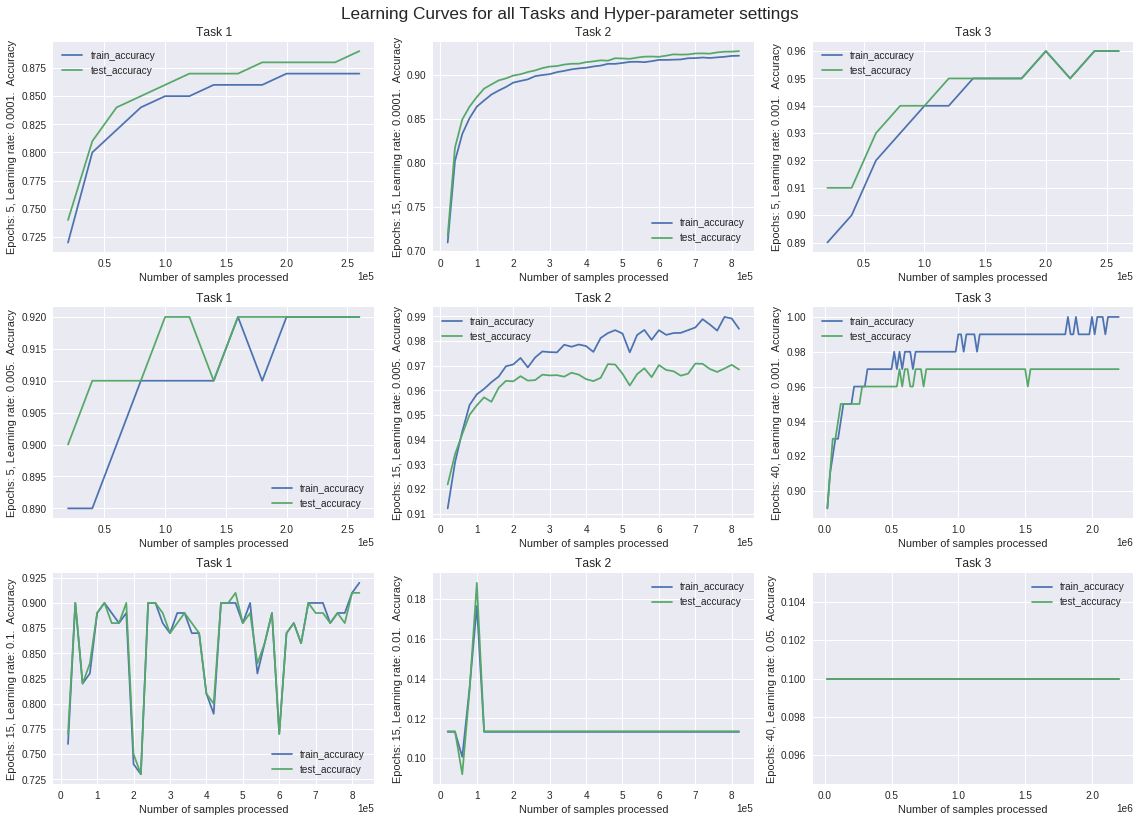

In [21]:
plot_learning_curves([my_experiments_task1, my_experiments_task2, my_experiments_task3])

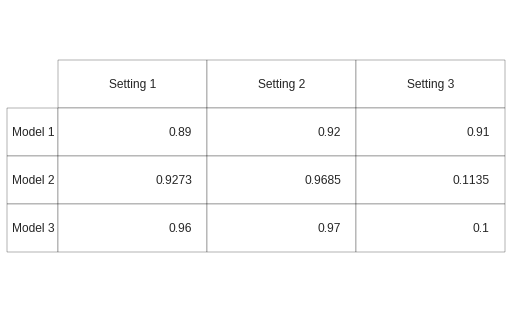

In [22]:
plot_summary_table([my_experiments_task1, my_experiments_task2, my_experiments_task3])

# Questions

###Q2.1 (15 pts): Compute the following derivatives 
Show all intermediate steps in the derivation (in markdown below). Provide the final results in vector/matrix/tensor form whenever appropiate.

a) [5 pts] Given the cross-entropy loss above, compute the derivative of the loss function with respect to the scores $z$ (the input to the softmax layer). 
$$\frac{\partial loss}{\partial z} = ?$$


Given the following (taken from above):

$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$

b) [10 pts] Consider the first model (M1: linear + softmax). Compute the derivative of the loss with respect to
  * the input $x$
  $$\frac{\partial loss}{\partial x} = ?$$
  * the parameters of the linear layer: weights $W$ and bias $b$
  $$\frac{\partial loss}{\partial W} = ?$$
  $$\frac{\partial loss}{\partial b} = ?$$
  
  
  Q2.1a)
  
  $$\frac{\partial loss}{\partial z} = \frac{\partial}{\partial z} \sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)      $$
  
  $$ = \sum_{i=1}^N  \bigg( -\frac{\partial}{\partial z} z_{i}[y_i] + \frac{\partial}{\partial z} \log{ \sum_{c=1}^{10} \exp(z_{i}[c]) }  \bigg)  $$
  
  $$ = \sum_{i=1}^N  \bigg( -[y_i] + \frac{1}{\sum_{c=1}^{10} \exp(z_{i}[c])} \frac{\partial}{\partial z} \bigg( { \sum_{c=1}^{10} \exp(z_{i}[c])} \bigg) \bigg) \space  $$
  
  $$ = \sum_{i=1}^N  \bigg( -[y_i] + \frac{\exp{(z_i)}}{\sum_{c=1}^{10} \exp(z_{i}[c])}  \bigg) $$ 
  
  Q2.1b)
  
  $$ \frac{\partial loss}{\partial x} = \frac{\partial loss}{\partial z}\mathbf{W} $$ 
  
  $$ \frac{\partial loss}{\partial x} = \bigg( \sum_{i=1}^N  \bigg( -[y_i] + \frac{\exp{(z_i)}}{\sum_{c=1}^{10} \exp(z_{i}[c])}  \bigg) \bigg) \mathbf{W }   $$ 
  
  
  $$ \frac{\partial loss}{\partial W} = \bigg(\frac{\partial loss}{\partial z} \bigg)^{T}\mathbf{x}^{T}   $$
  
  $$ \frac{\partial loss}{\partial W} = \bigg( \sum_{i=1}^N  \bigg( -[y_i] + \frac{\exp{(z_i)}}{\sum_{c=1}^{10} \exp(z_{i}[c])}  \bigg) \bigg)^{T}\mathbf{x}^{T}   $$
  
  $$\frac{\partial loss}{\partial b} = \frac{\partial loss}{\partial z} = \sum_{i=1}^N  \bigg( -[y_i] + \frac{\exp{(z_i)}}{\sum_{c=1}^{10} \exp(z_{i}[c])}  \bigg) $$

# PART 3: Convolution Models (35 pts)



## Model 4 (5 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 

In [0]:
  
  def cnn_model(data, output, learning_rate):
    """
    Args: data = x in our case
          output = y_ in our case
          learning_rate = learning_rate in our case - from settings 
          
    Output: returns the following:
            loss = the cross entropy loss
            minimized_loss = the minimized loss via SGD
            accuracy = % of correct predictions


          
    Notes: we've predefined the loss function we want to minimize. Since we know we 
           want to minimise the cross entropy loss via SGD
           
           The function is split into defining layers, applying transformations,
           computing prediction and accuracy, computing loss and finally optimising
           loss via SGD.
    """
    # Define layers
    layers = []
    
    conv1 = tf.layers.conv2d(
      inputs= data,
      filters=8,
      kernel_size=[3,3],
      padding="same")
    
    #print("Dimension of output after doing 1st conv", conv1.get_shape())
    
    
    pool1 = tf.layers.max_pooling2d(conv1, pool_size=[2,2], strides=1)
    layers.append(pool1)
    
    #print("Dimension of output after doing 1st pool", pool1.get_shape())
    
    conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=8,
      kernel_size= [3,3],
      padding="same")
    
    pool2 = tf.layers.max_pooling2d(conv2, pool_size=[2,2], strides=1)
    layers.append(pool2)
    #print("Dimension of output after doing 2nd conv", conv2.get_shape())
    #print("Dimension of output after doing 2nd conv+pool", pool2.get_shape())

    #layers.append(conv2)
    
    pool2_flat = tf.layers.flatten(pool2)
    dense = tf.layers.dense(inputs=pool2_flat, units=32, activation=tf.nn.relu)
    
    layers.append(dense)
    
    logits = tf.layers.dense(inputs = dense, units = 10)
    
    layers.append(logits)
    
    prediction = tf.nn.softmax(layers[-1], axis = 1)
    
    true_predictions = tf.equal(tf.argmax(output, 1), tf.argmax(prediction,1))
    
    accuracy = tf.math.reduce_mean(tf.cast(true_predictions, dtype = tf.float64))
    
    loss = tf.nn.softmax_cross_entropy_with_logits(labels = output, logits = layers[-1])
    
    loss = tf.math.reduce_sum(loss)
    
    minimized_loss = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
    
    return loss, minimized_loss, accuracy

In [24]:
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.
  
  Model = cnn_model(x_image, y_, learning_rate)
  
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      #batch_xs = np.reshape(batch_xs, [-1,1,28,28])

      #################
      # Training step #
      #################
      sess.run(fetches = Model[1],
                                  feed_dict = {x: batch_xs, y_: batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        proportion = 0.2
        eval_input = eval_mnist.train.images
        eval_label = eval_mnist.train.labels
        
        subset = int(len(eval_label)*proportion)
        
        
        subset_input = eval_input[0:subset,:]
        subset_label = eval_label[0:subset,:]
        #subset_input = np.reshape(subset_input, [-1,1,28,28])
        
        #print(sess.run(fetches = Model[2],
        #                                        feed_dict = {x: subset_input, y_: subset_label}),2)
        
        train_accuracy.append(sess.run(fetches = Model[2],
                                                feed_dict = {x: subset_input, y_: subset_label}))
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        testing_accuracy4 = []
        

        xs = eval_mnist.test.images
        ys = eval_mnist.test.labels

        batch_acc = sess.run(fetches = Model[2],
                               feed_dict = {x: xs, y_ : ys})
        
        test_accuracy.append(batch_acc)
        

    experiments_task4.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Ex

In [25]:
for i in range(3):
  print("Epoch, Learning rate", experiments_task4[i][0])
  print("Training Samples:", len(experiments_task4[i][1]), "Testing Samples:", len(experiments_task4[i][2]))
  print("Training Error", experiments_task4[i][1])
  print("Testing Error", experiments_task4[i][2])
  print("")

Epoch, Learning rate (5, 0.01)
Training Samples: 13 Testing Samples: 13
Training Error [0.11318181818181818, 0.11318181818181818, 0.10636363636363637, 0.10636363636363637, 0.10381818181818182, 0.11318181818181818, 0.11318181818181818, 0.10381818181818182, 0.11318181818181818, 0.09627272727272727, 0.11318181818181818, 0.11318181818181818, 0.11318181818181818]
Testing Error [0.1135, 0.1135, 0.101, 0.101, 0.1028, 0.1135, 0.1135, 0.1028, 0.1135, 0.0974, 0.1135, 0.1135, 0.1135]

Epoch, Learning rate (10, 0.001)
Training Samples: 27 Testing Samples: 27
Training Error [0.9372727272727273, 0.9693636363636363, 0.9758181818181818, 0.9742727272727273, 0.9807272727272728, 0.984, 0.9847272727272727, 0.9855454545454545, 0.9843636363636363, 0.9876363636363636, 0.9897272727272727, 0.9915454545454545, 0.9900909090909091, 0.9872727272727273, 0.9924545454545455, 0.9940909090909091, 0.9943636363636363, 0.9944545454545455, 0.9930909090909091, 0.9948181818181818, 0.9922727272727273, 0.9955454545454545, 0.99

## Model 5 (10 pts): Separable Convolutions

### Separable Convolutions 
The idea behind separable convolutions is very simple. The premise is that if we consider a 2D/3D filter we would want to apply to an input tensor $x$, we could produce a very similar effect by instead applying a series of simpler transformations (in our case convolutions). Doing this would typically end up in less computations and/or fewer parameters (which in a learn). 

**Example 1:** An famous example of such a 2D filter is the Sobel kernel. 
\\begin{equation}
\\begin{bmatrix} 
-1 & 0 & +1 \\\
-2 & 0 & +2 \\\ 
-1 & 0 & +1
\\end{bmatrix} 
=
\\begin{bmatrix} 
1  \\\
2 \\\ 
1 
\\end{bmatrix} \times [-1, 0,1]
\\end{equation}

Thus we can see that this $3 \times 3$ kernel $k$ can be expressed as the dot product  of $3 \times 1$ kernel $k_1$ and $1 \times 3$ kernel $k_2$. The above is a particular example of a spatial separable convolution, but the principle is more generally applicable. And a common model of 'separating' a kernel is essentially separating the normal convolution process in two parts: a depthwise convolution and a pointwise convolution. The depthwise convolution applies a different convolution kernel to every input channel. This will produce an output tensor with the same number of input channels. Then the pointwise convolution will take this intermediate result and apply a $1 \times 1 \times n_{input\_channels}$ kernel to it. As the name suggests this will look individually at every point in the intermediate output. And we will apply as many of these as we need to produce the desired output channels.


**Example 2**: For instance, if we consider a $3\times 3$ convolutional kernel with $16$ input channels and $64$ output channels. The depthwise convolution will be a $3\times 3 \times 16$ kernel (a $3 \times 3$ kernel for each input channel) and the pointwise kernel will be made of $64$ $1\times 1 \times 16$ kernels.

\\

**References and Further Reading:** \\
[Mobilenet](https://arxiv.org/pdf/1704.04861.pdf) \\
[Inception Models](https://arxiv.org/abs/1610.02357) 


### Model 5
3 layer convolutional model, similar to Model 4, but now with separable convolutions + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ separable conv(3x3x8)$\rightarrow$ separable conv(3x3x4) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- No stride. Use max pooling with 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

In [0]:

def sep_cnn_model(data, output, learning_rate):
    """
    Args: data = x in our case
          output = y_ in our case
          learning_rate = learning_rate in our case - from settings 
          
    Output: returns the following:
            loss = the cross entropy loss
            minimized_loss = the minimized loss via SGD
            accuracy = % of correct predictions


          
    Notes: we've predefined the loss function we want to minimize. Since we know we 
           want to minimise the cross entropy loss via SGD
           
           The function is split into defining layers, applying transformations,
           computing prediction and accuracy, computing loss and finally optimising
           loss via SGD.
    """
    # Define layers
    layers = []
    
    conv1 = tf.layers.separable_conv2d(
      inputs= data,
      filters=8,
      kernel_size=[3,3],
      padding="same")
    
    pool1 = tf.layers.max_pooling2d(conv1, pool_size=2, strides=1)
    layers.append(pool1)

    conv2 = tf.layers.separable_conv2d(
      inputs=pool1,
      filters=4,
      kernel_size= [3,3],
      padding="same"
      )
    
    pool2 = tf.layers.max_pooling2d(conv2, pool_size=2, strides=1)
    layers.append(pool2)

    pool2_flat = tf.layers.flatten(pool2)
    dense = tf.layers.dense(inputs=pool2_flat, units=32, activation=tf.nn.relu)
    
    layers.append(dense)
    
    logits = tf.layers.dense(inputs = dense, units = 10)
    
    layers.append(logits)
    
    prediction = tf.nn.softmax(layers[-1], axis = 1)
    
    true_predictions = tf.equal(tf.argmax(output, 1), tf.argmax(prediction,1))
    
    accuracy = tf.math.reduce_mean(tf.cast(true_predictions, dtype = tf.float64))
    
    loss = tf.nn.softmax_cross_entropy_with_logits(labels = output, logits = layers[-1])
    
    loss = tf.math.reduce_sum(loss)
    
    minimized_loss = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
    
    return loss, minimized_loss, accuracy

In [27]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task5 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

print('Training Model 5')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.
  
  Model = sep_cnn_model(x_image, y_, learning_rate)

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      
      sess.run(fetches = Model[1],
                                  feed_dict = {x: batch_xs, y_: batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        proportion = 0.2
        eval_input = eval_mnist.train.images
        eval_label = eval_mnist.train.labels
        
        subset = int(len(eval_label)*proportion)
        
        subset_input = eval_input[0:subset,:]
        subset_label = eval_label[0:subset,:]

        train_accuracy.append(sess.run(fetches = Model[2],
                                          feed_dict = {x: subset_input, y_: subset_label}))
    
        #####################################
        # Compute and store test accuracy.  #
        #####################################
       
        xs = eval_mnist.test.images
        ys = eval_mnist.test.labels
        testing_acc = sess.run(fetches = Model[2],
                               feed_dict = {x: xs, y_ : ys})
        
         
        test_accuracy.append(testing_acc)

    experiments_task5.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 5
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use keras.layers.separable_conv2d instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:G

In [28]:
for i in range(3):
  print("Epoch, Learning rate", experiments_task5[i][0])
  print("Training Samples:", len(experiments_task5[i][1]), "Testing Samples:", len(experiments_task5[i][2]))
  print("Training Error", experiments_task5[i][1])
  print("Testing Error", experiments_task5[i][2])
  print("")

Epoch, Learning rate (5, 0.01)
Training Samples: 13 Testing Samples: 13
Training Error [0.11318181818181818, 0.11318181818181818, 0.10381818181818182, 0.11318181818181818, 0.10381818181818182, 0.11318181818181818, 0.097, 0.10245454545454545, 0.11318181818181818, 0.11318181818181818, 0.09245454545454546, 0.09627272727272727, 0.11318181818181818]
Testing Error [0.1135, 0.1135, 0.1028, 0.1135, 0.1028, 0.1135, 0.1032, 0.098, 0.1135, 0.1135, 0.0982, 0.0974, 0.1135]

Epoch, Learning rate (10, 0.001)
Training Samples: 27 Testing Samples: 27
Training Error [0.9315454545454546, 0.9490909090909091, 0.9588181818181818, 0.968, 0.9701818181818181, 0.9746363636363636, 0.9760909090909091, 0.9788181818181818, 0.9660909090909091, 0.982, 0.9860909090909091, 0.9810909090909091, 0.9855454545454545, 0.9840909090909091, 0.9896363636363636, 0.9874545454545455, 0.9854545454545455, 0.99, 0.9906363636363636, 0.9898181818181818, 0.9904545454545455, 0.9914545454545455, 0.9926363636363637, 0.9922727272727273, 0.99

# Results

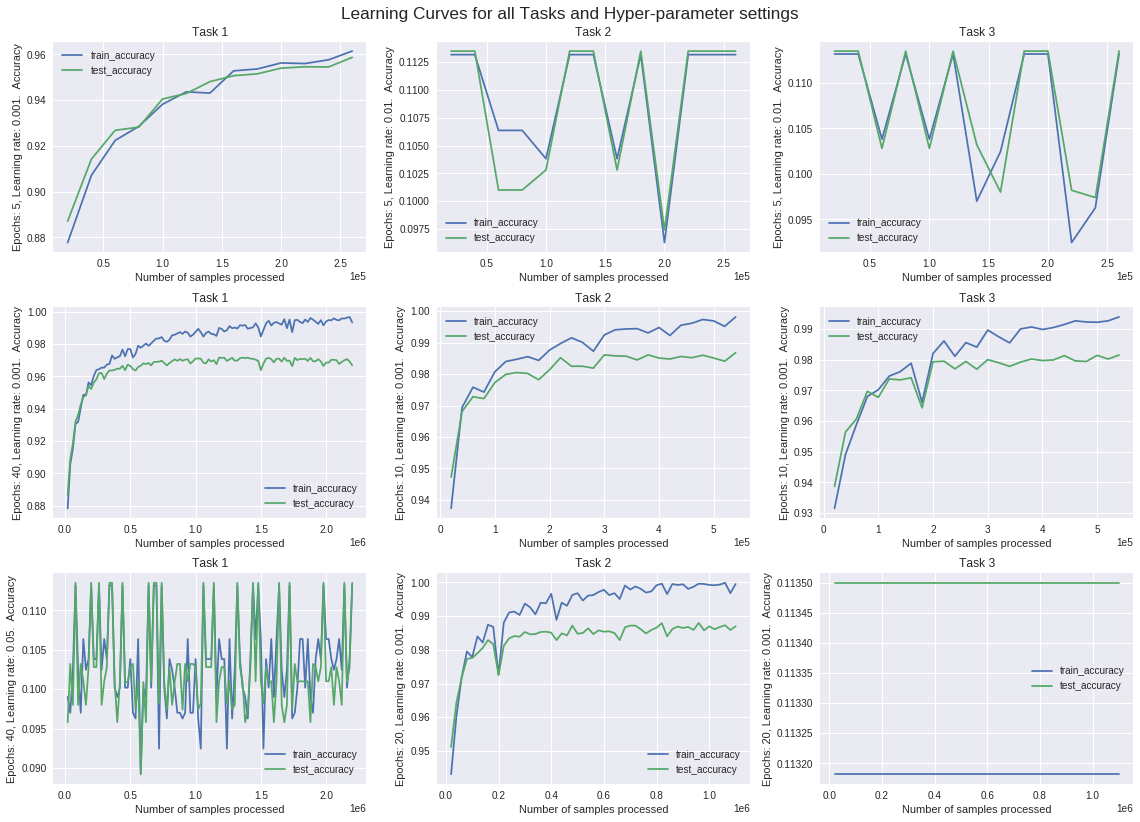

In [29]:
plot_learning_curves([experiments_task3, experiments_task4, experiments_task5])

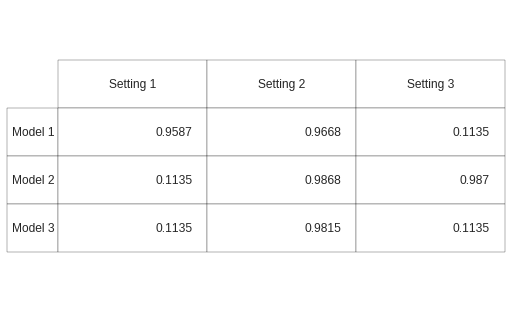

In [30]:
plot_summary_table([experiments_task3, experiments_task4, experiments_task5])

# Questions

### Q3.1 (2 pts): Let's revisit Example 2 above (Sec. Separable Convolutions). Given an input image of $28 \times 28 \times 16$:
* a) What are the dimensions of the result of the depthwise convolution? How many computations were performed in this step? \\
* b) What about the dimension of the output after the pointwise convolution?  How many computations were perfomend in this step? \\
* c) Compare this with applying a normal 2D convolution $3\times 3 \times 64$ to the orginal image. What is the dimensionality of the output? What about the number of computations?

a) For a depthwise convolution - the resulting dimension will be $ 3 \times 3 \times 16 $. This was calculated by reading the MobileNets paper where the output size referenced is $D_K \times D_K \times M $. This also agrees with what was said above where the number of input channels is the same as the output channels.


The number of computations is therefore $ 3^2 \times 16 \times 28^2 = 112,896$ computations (From the MobileNets paper it is $D_K \times D_K \times M \times D_F \times D_F $)

b) The resulting dimension of the pointwise convolution is $1 \times 1 \times 64$. I.e a $1 \times 1$ convolution $64$ times.

The number of computations for a pointwise convolution is $16 \times 64\times 28 \times 28 = 802,816$. From the MobileNets paper this is $M \times N \times D_F \times D_F$

c) When we apply a normal 2d convolution $3 \times 3 \times 64$ the resulting dimension of the output is $3 \times 3 \times 16 \times 64 $.

The total number of computations for a separable convolution is the sum of the computations expresse in questions $a)$ and $b)$ will be $ 915,712 $ vs a normal convolution which will be $ 3 \times 3 \times 16 \times 64 \times 28^2 = 7,225,344 $. We can therefore see that  $915,712 << 7,225,344$ in the number of computations and so separable convolutions are faster.

### Q3.1 (3 pts): Convolutions vs Separable Convolutions  
* Compare the performance of the two convolutional model vs previous models in Part 1.
* Compare the number of parameters in Model 5 vs Model 4? Explicit computation is required here. 
* Under which conditions could it be advantageous to use separable convolutions instead of normal convolutions?  \\

**Hint:** Think in terms of storage, speed of training, speed of inference, representation power.

- Both the models have similar accuracies with separable trading off some accuracy but the separable one was much faster in obtaining results due to the significant reduction in the number of calculations performed.

- For model 4 we have $ 3 \times 3 \times 1 \times 32 \times 28 \times 28 = 225,792$ in the case of model 5 we have $ 3 \times 3 \times 1 \times 28 \times 28 + 1 \times 32 \times 28 \times 28 = 32,144$ Since our input channels is $1$, our kernel size is $4$ and the feature map is of size $28$ and our output channel is $32 = 4 \times 8$ (first convolution and second convolution) and so model 5 has a lot less parameters

- Where physical capacity is heavily limited such as using a mobile phone is where separable convolutions could be advantages due to the reduction in parameters and therefore reducing the number of floating point multiplication operations as it requires less computing power and therefore less storage space, and faster to train and infer.

### Q3.3 (7 pts): Equivalence between 2D convolutions and separable convolutions.

Let's revisit **Example 1** above. Consider a 2D kernel $k$ of dimension $N\times M$ and two 1D kernels: $k_1$, a $1\times N$ and $k_2$, a $1 \times N$ kernel such that $k = k_1^Tk_2$. 
* Prove that the above equality holds, $k = k_1^Tk_2$, applying $k$ to an input signal $x$ is equivalent to applying consecutively the 1D kernels $k_1$ and $k_2$. In which order do these 1D kernels need to be applied for the equivalence to hold?

* Does there always exist such a decomposition? That is, for any 2D kernel $k$, can one find $k_1$ and $k_2$ s.t. $k = k_1^Tk_2$? If so, provide a proof. If not, provide a counter-example.

----

- Here we are multiplying with respect to the dimensions $k = k_1^T k_2 = (1 \times N)^T(1 \times M) = (N \times 1)(1 \times M) = (N \times M)$ 

An important note - to whom who wrote these questions - please proof read the questions - these typo's are unacceptable. The  order of which the operations occur must be that $k_1^T$ must be first then the second kernel $k_2$ must be applied to get the correct dimensions of $k$ that is $N \times M$. If it was the other way round say $k_2^T \times k_1$ then we would get dimension of $ M \times N $.

-  There does not exist a decomposition. Suppose that $ M $ is a 2d kernel of size $ 2 \times 2 $. A counter example is:


$ M= \begin{bmatrix} 1 & 0   \\0 & 1 
  \end{bmatrix} $
  
$ k_1 = \begin{bmatrix} a & b
  \end{bmatrix}  $

$ k_2 = \begin{bmatrix} c & d
  \end{bmatrix}  $
  
Then $ k_1^Tk_2 = \begin{bmatrix} ac & da \\bc & bd 
  \end{bmatrix} = \begin{bmatrix} 1 & 0   \\0 & 1 
  \end{bmatrix}  $

We can see that $ac \neq 0, bd \neq 0$ so  $a,b,c,d \neq 0$ and therefore $da \neq 0, bc \neq 0$ which we have a contradiction since if $ da \neq 0, bc \neq 0$ then the zero entries of $M$ shouldn't exist and so there does not exist a decomposition.

### Q3.4 (8 pts): Based potentially on insights from Q3.3. propose a different separate conv. model that achieves similar performance as Model 4, but has fewer parameters. 

a) Report and justify your choice. 

Here i've used one separable conv layer as this will immediately reduce the number of parameters / computations. I've also reduced the kernel size to $2 \times 2$

b) Implement, train your model and compare perfomance with Model 4 (setting 3). \\
**Note**:This will likely require a hyperparameter search for the new setting.

Though i did not do a hyper parameter search i've increased the number of epochs and made the learning rate slightly lower but as a result the accuracies are decent. When comparing with model 4, the accracy may be by 1-2% but what we are trading off is the time at which it trains - which is much faster due to the lower number of computations.


In [0]:
def sep_cnn_model2(data, output, learning_rate):
    """
    Args: data = x in our case
          output = y_ in our case
          learning_rate = learning_rate in our case - from settings 
          
    Output: returns the following:
            loss = the cross entropy loss
            minimized_loss = the minimized loss via SGD
            accuracy = % of correct predictions


          
    Notes: we've predefined the loss function we want to minimize. Since we know we 
           want to minimise the cross entropy loss via SGD
           
           The function is split into defining layers, applying transformations,
           computing prediction and accuracy, computing loss and finally optimising
           loss via SGD.
    """
    
    conv1 = tf.layers.separable_conv2d(
      inputs= data,
      filters=8,
      kernel_size=[2,2],
      padding="same",
      activation=tf.nn.relu)
    
    
    pool1 = tf.layers.max_pooling2d(conv1, pool_size=2, strides=1)
    
    pool2_flat = tf.layers.flatten(pool1)
    dense = tf.layers.dense(inputs=pool2_flat, units=32, activation=tf.nn.relu)

    
    logits = tf.layers.dense(inputs = dense, units = 10)

    
    prediction = tf.nn.softmax(logits, axis = 1)
    
    true_predictions = tf.equal(tf.argmax(output, 1), tf.argmax(prediction,1))
    
    accuracy = tf.math.reduce_mean(tf.cast(true_predictions, dtype = tf.float64))
    
    loss = tf.nn.softmax_cross_entropy_with_logits(labels = output, logits = prediction)
    
    loss = tf.math.reduce_sum(loss)
    
    minimized_loss = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
    
    return loss, minimized_loss, accuracy

In [32]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task55 = []
settings = [(50, 0.0005)]

print('Training Model 5')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.
  
  Model = sep_cnn_model2(x_image, y_, learning_rate)

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      
      sess.run(fetches = Model[1],
                                  feed_dict = {x: batch_xs, y_: batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        proportion = 0.2
        eval_input = eval_mnist.train.images
        eval_label = eval_mnist.train.labels
        
        subset = int(len(eval_label)*proportion)

        subset_input = eval_input[0:subset,:]
        subset_label = eval_label[0:subset,:]

        train_accuracy.append(sess.run(fetches = Model[2],
                                          feed_dict = {x: subset_input, y_: subset_label}))
  
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        xs = eval_mnist.test.images 
        ys = eval_mnist.test.labels
        batch_acc = sess.run(fetches = Model[2],
                               feed_dict = {x: xs, y_ : ys})
        
        test_accuracy.append(batch_acc)

    experiments_task55.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 5
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


# Q3.4 Output

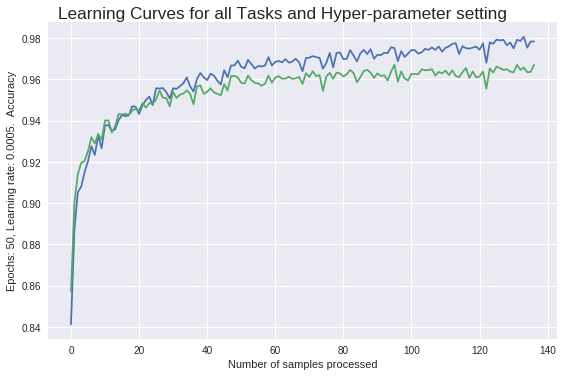

In [33]:
# Results
#for i in range(1):
  #print("Epoch, Learning rate", experiments_task55[i][0])
  #print("Training Samples:", len(experiments_task55[i][1]), "Testing Samples:", len(experiments_task55[i][2]))
  #print("Training Error", experiments_task55[i][1])
  #print("Testing Error", experiments_task55[i][2])
  #print("")
  
fig, ax = plt.subplots(1, 1)
st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter setting",
      fontsize="x-large")

# Components to plot
setting = experiments_task55[0][0]
training_acc = experiments_task55[0][1]
testing_acc = experiments_task55[0][2]

# Plot
ax.plot(training_acc)
ax.plot(testing_acc)
ax.set_xlabel('Number of samples processed')
ax.set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
  
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.91)
plt.show()